In [17]:
import tensorflow as tf
from PIL import Image

In [18]:
model=tf.keras.models.load_model("stale vs fresh.h5")

In [19]:
classes=["fresh_apple","fresh_banana","fresh_bitter_gourd","fresh_capsicum","fresh_orange","fresh_tomoto","stale_apple","stale_banana","stale_bitter_gourd","stale_capsicum","stale_orange","stale_tomoto"]
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 48)          13872     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 48)        

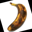

In [20]:
img=Image.open("/home/student/Desktop/PYTHON/G18/project/archive/stale_banana/rotated_by_15_Screen Shot 2018-06-12 at 8.49.30 PM.png")
img=img.resize((32,32))
img

In [21]:
test=tf.reshape(tf.constant(img)/255,(-1,32,32,3))
preds=model.predict(test,verbose=False)[0]*100
preds=tf.math.round(preds)
print(preds)

tf.Tensor([ 0.  0.  0.  0.  0.  0.  0. 96.  0.  0.  4.  0.], shape=(12,), dtype=float32)


In [22]:
confidence=tf.reduce_max(preds)
index=int(tf.where(preds==confidence)[0][0])
print(index)

7


In [23]:
pred=classes[index]

In [24]:
print(pred.title(),int(confidence),'%')

Stale_Banana 96 %
